In [130]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy.signal import butter
from scipy.signal import butter, filtfilt, detrend
from scipy.integrate import cumtrapz
import seaborn

In [5]:
data_driving = bagreader("data_driving.bag")

[INFO]  Data folder data_driving already exists. Not creating.


In [6]:
data_imu = data_driving.message_by_topic("/imu")
data_gps = data_driving.message_by_topic("/gps")

In [7]:
imu = pd.read_csv(data_imu)
gps = pd.read_csv(data_gps)

In [8]:
imu

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,imu.x,imu.y,imu.z,imu.w,angular_velocity.x,angular_velocity.y,angular_velocity.z,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,mag_field.x,mag_field.y,mag_field.z,raw_data
0,1.679948e+09,1,1679947539,749418973,imu1_frame,0.028464,-0.015983,-0.631737,0.774495,-0.000097,-0.000242,-0.001218,0.094,-0.604,-9.545,0.0595,0.3070,0.4751,"b'$VNYMR,-078.385,+000.641,+003.686,+00.0613,+..."
1,1.679948e+09,2,1679947539,801808595,imu1_frame,0.028464,-0.015983,-0.631731,0.774500,0.001506,0.002901,0.000087,0.106,-0.593,-9.579,0.0623,0.3154,0.4762,"b'$VNYMR,-078.383,+000.644,+003.687,+00.0605,+..."
2,1.679948e+09,3,1679947539,851906776,imu1_frame,0.028482,-0.015974,-0.631711,0.774516,0.001411,-0.000692,-0.000850,0.074,-0.596,-9.535,0.0623,0.3154,0.4762,"b'$VNYMR,-078.381,+000.643,+003.687,+00.0605,+..."
3,1.679948e+09,4,1679947539,901720285,imu1_frame,0.028482,-0.015974,-0.631690,0.774533,0.001327,0.003547,-0.000165,0.101,-0.639,-9.569,0.0586,0.3126,0.4782,"b'$VNYMR,-078.379,+000.644,+003.687,+00.0559,+..."
4,1.679948e+09,5,1679947539,951338291,imu1_frame,0.028486,-0.015956,-0.631718,0.774510,0.001205,0.005626,-0.000888,0.123,-0.618,-9.603,0.0686,0.3086,0.4754,"b'$VNYMR,-078.376,+000.647,+003.686,+00.0613,+..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25329,1.679949e+09,25330,1679948806,208075284,imu1_frame,0.063698,0.034675,-0.241849,0.967600,0.000076,-0.001455,0.000977,0.976,-1.019,-9.504,0.0274,0.2306,0.3629,"b'$VNYMR,-027.765,+005.620,+006.143,+00.0273,+..."
25330,1.679949e+09,25331,1679948806,259439706,imu1_frame,0.063699,0.034673,-0.241874,0.967594,0.001273,0.000150,-0.000439,0.951,-1.025,-9.555,0.0265,0.2321,0.3596,"b'$VNYMR,-027.769,+005.619,+006.144,+00.0301,+..."
25331,1.679949e+09,25332,1679948806,307129383,imu1_frame,0.063716,0.034668,-0.241891,0.967588,0.000205,0.001796,0.000249,0.984,-1.055,-9.546,0.0288,0.2315,0.3619,"b'$VNYMR,-027.770,+005.620,+006.146,+00.0269,+..."
25332,1.679949e+09,25333,1679948806,358593702,imu1_frame,0.063735,0.034672,-0.241892,0.967587,-0.000539,-0.000200,0.001217,0.897,-1.036,-9.523,0.0255,0.2312,0.3595,"b'$VNYMR,-027.771,+005.620,+006.146,+00.0250,+..."


In [9]:
gps

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,UTM_easting,UTM_northing,UTC,Zone,Letter,raw_data
0,1.679948e+09,6,72340,0,GPS1_Frame,42.337290,-71.089587,27.799999,1.6,327858.678197,4.689341e+06,20:5:40,19,T,NaN
1,1.679948e+09,7,72340,0,GPS1_Frame,42.337290,-71.089587,0.000000,0.0,327858.678197,4.689341e+06,20:5:40,19,T,NaN
2,1.679948e+09,8,72341,0,GPS1_Frame,42.337290,-71.089587,27.799999,1.6,327858.678197,4.689341e+06,20:5:41,19,T,NaN
3,1.679948e+09,9,72341,0,GPS1_Frame,42.337290,-71.089587,0.000000,0.0,327858.678197,4.689341e+06,20:5:41,19,T,NaN
4,1.679948e+09,10,72342,0,GPS1_Frame,42.337290,-71.089587,27.799999,1.6,327858.678197,4.689341e+06,20:5:42,19,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,1.679949e+09,2534,73604,0,GPS1_Frame,42.337363,-71.089557,17.500000,1.2,327861.349818,4.689349e+06,20:26:44,19,T,NaN
2529,1.679949e+09,2535,73604,0,GPS1_Frame,42.337363,-71.089557,0.000000,0.0,327861.349818,4.689349e+06,20:26:44,19,T,NaN
2530,1.679949e+09,2536,73605,0,GPS1_Frame,42.337363,-71.089557,17.500000,1.2,327861.349818,4.689349e+06,20:26:45,19,T,NaN
2531,1.679949e+09,2537,73605,0,GPS1_Frame,42.337363,-71.089557,0.000000,0.0,327861.349818,4.689349e+06,20:26:45,19,T,NaN


Text(0, 0.5, 'Magnetic field in y (in tesla)')

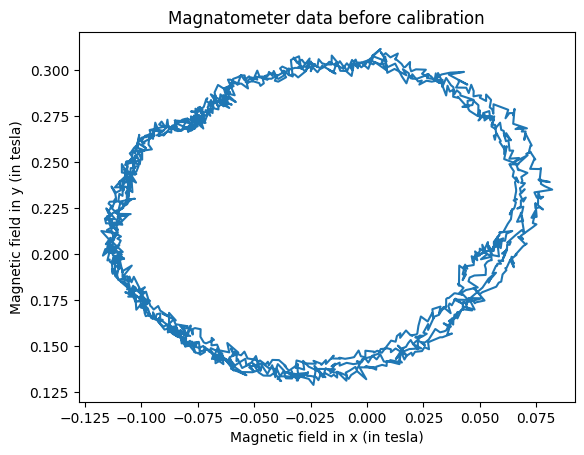

In [10]:
# Magnatometer before calibration
plt.plot(imu["mag_field.x"][2900:4500],imu["mag_field.y"][2900:4500])
plt.title("Magnatometer data before calibration")
plt.xlabel("Magnetic field in x (in tesla)")
plt.ylabel("Magnetic field in y (in tesla)")

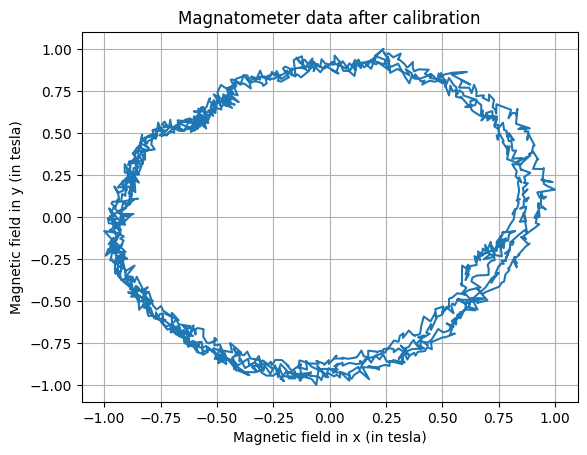

In [199]:
# Magnetometer after calibration
x = imu["mag_field.x"][2900:4500]
y = imu["mag_field.y"][2900:4500]

x_mean = np.mean(x)
y_mean = np.mean(y)

x_offset = (np.max(x) + np.min(x)) / 2
y_offset = (np.max(y) + np.min(y)) / 2

x_corr = x - x_offset
y_corr = y - y_offset

x_scale = (np.max(x_corr) - np.min(x_corr)) / 2
y_scale = (np.max(y_corr) - np.min(y_corr)) / 2

x_corr /= x_scale
y_corr /= y_scale

plt.plot(x_corr,y_corr)
plt.title("Magnatometer data after calibration")
plt.xlabel("Magnetic field in x (in tesla)")
plt.ylabel("Magnetic field in y (in tesla)")
plt.grid()

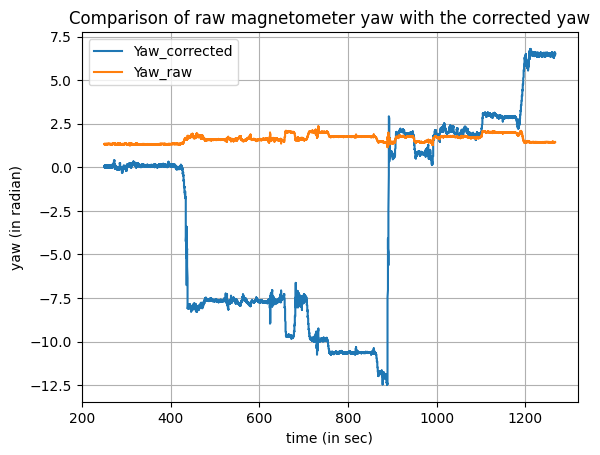

In [251]:
t_yaw =[]
yaw = np.arctan2(imu["mag_field.y"][5000:],imu["mag_field.x"][5000:])
for i in imu["header.stamp.secs"] :
    t_yaw.append(i - imu["header.stamp.secs"][0])

xx = imu["mag_field.x"][5000:]
yy = imu["mag_field.y"][5000:]
x_corrr = xx -x_offset 
y_corrr = yy -y_offset

x_corrr /= x_scale
y_corrr /= y_scale

yaw_corrected = np.unwrap(np.arctan2(y_corrr,x_corrr))
plt.plot(t_yaw[5000:],yaw_corrected, label = "Yaw_corrected")
plt.plot(t_yaw[5000:],yaw,label = "Yaw_raw")
plt.title("Comparison of raw magnetometer yaw with the corrected yaw")
plt.ylabel("yaw (in radian)")
plt.xlabel("time (in sec)")
plt.grid()
plt.legend()

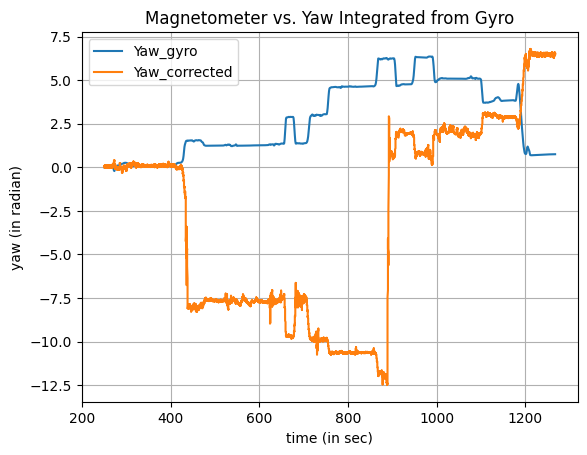

In [252]:
yaw_gps = cumtrapz(imu["angular_velocity.z"][5000:],imu["header.stamp.secs"][5000:],initial = 0)
plt.plot(t_yaw[5000:],yaw_gps, label = "Yaw_gyro")
plt.plot(t_yaw[5000:],yaw_corrected, label = "Yaw_corrected")
plt.title("Magnetometer vs. Yaw Integrated from Gyro")
plt.ylabel("yaw (in radian)")
plt.xlabel("time (in sec)")
plt.grid()
plt.legend()

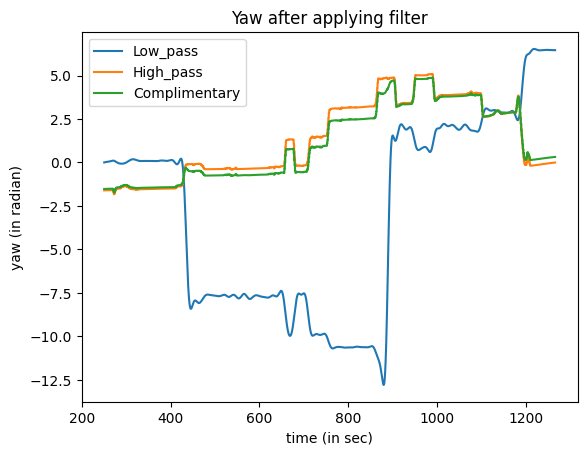

In [253]:
#low_pass magnetometer
lp_fc = 0.05
order = 4
nyq = 0.5 * 20
lp_fc_norm = lp_fc / nyq
b, a = butter(order, lp_fc_norm, btype='lowpass')
filtered_magnetometer = filtfilt(b, a, yaw_corrected)

#high_pass yaw_rate/gyro
hp_fc = 0.000105
order = 4
nyq = 0.5 * 20
hp_fc_norm = hp_fc / nyq
b, a = butter(order, hp_fc_norm, btype='highpass')
filtered_yaw_integrated = filtfilt(b, a, yaw_gps)

weight = 0.95

complimentary_filtered = weight*np.unwrap(filtered_yaw_integrated) + (1-weight)*np.unwrap(filtered_magnetometer)

seaborn.lineplot(y = filtered_magnetometer,x = time[5000:],label = 'Low_pass')
seaborn.lineplot(y = filtered_yaw_integrated,x = time[5000:],label = 'High_pass')
seaborn.lineplot(y = complimentary_filtered,x = time[5000:],label = 'Complimentary')


plt.title("Yaw after applying filter")
plt.ylabel("yaw (in radian)")
plt.xlabel("time (in sec)")
plt.legend()



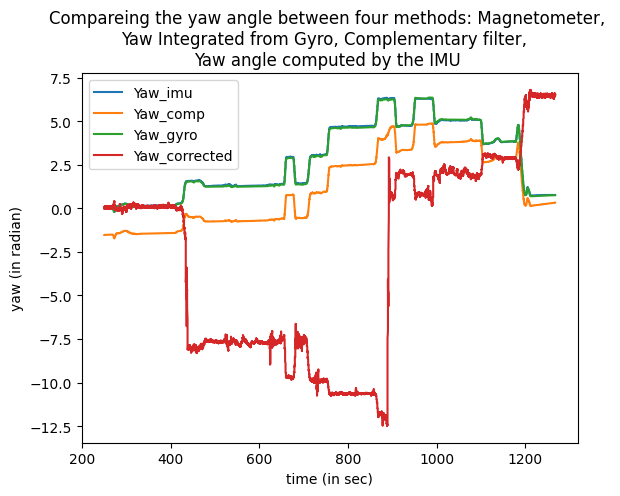

In [254]:
x = imu['imu.x'].to_numpy()
y = imu['imu.y'].to_numpy()
z = imu['imu.z'].to_numpy()
w = imu['imu.w'].to_numpy()
q = np.array([x,y,z,w])
#q /= np.linalg.norm(q)

roll_original_gyro = np.unwrap(np.arctan2(2*(q[3]*q[0] + q[1]*q[2]), 1 - 2*(q[0]**2 + q[1]**2)))

pitch_original_gyro = np.unwrap(np.arcsin(2*(q[3]*q[1] - q[0]*q[2])))

yaw_original_gyro = np.unwrap(np.arctan2(2*(q[3]*q[2] + q[0]*q[1]), 1 - 2*(q[1]**2 + q[2]**2)))
yaw_original_gyro[5000:] = yaw_original_gyro[5000:] - yaw_original_gyro[5000]
plt.plot(t_yaw[5000:],yaw_original_gyro[5000:],label = "Yaw_imu")
plt.plot(t_yaw[5000:],complimentary_filtered,label = "Yaw_comp")
plt.plot(t_yaw[5000:],yaw_gps, label = "Yaw_gyro")
plt.plot(t_yaw[5000:],yaw_corrected, label = "Yaw_corrected")
plt.title(f"Compareing the yaw angle between four methods: Magnetometer, \n""Yaw Integrated from Gyro, Complementary filter,  \n""Yaw angle computed by the IMU ")
plt.ylabel("yaw (in radian)")
plt.xlabel("time (in sec)")
plt.legend()

Text(0.5, 0, 'time (in sec)')

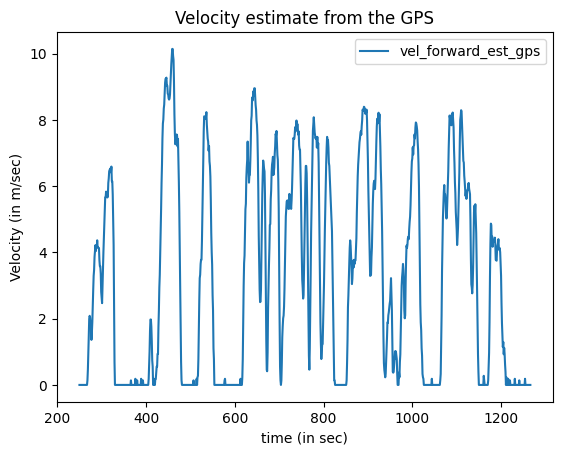

In [186]:
# Velocity calculation on GPS
start3 = 5000
start3_gps = start3//10
start3_gps_time = start3_gps//2
fs_gps = 2
dt_gps = 1/fs_gps
time_gps = np.arange(0, len(gps) / fs_gps, 2*dt_gps)

dist_x = gps['UTM_easting'][start3_gps:]
dist_y = gps['UTM_northing'][start3_gps:]

vel_x = np.diff(dist_x)/(dt_gps*2)
vel_y = np.diff(dist_y)/(dt_gps*2)

vel_x = vel_x[1::2]
vel_x = np.append(vel_x,vel_x[-1])
vel_y = vel_y[1::2]
vel_y = np.append(vel_y,vel_y[-1])

vel_forward_est_gps = np.sqrt(vel_x**2 + vel_y**2)

seaborn.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="vel_forward_est_gps")
plt.title("Velocity estimate from the GPS")
plt.ylabel("Velocity (in m/sec)")
plt.xlabel("time (in sec)")

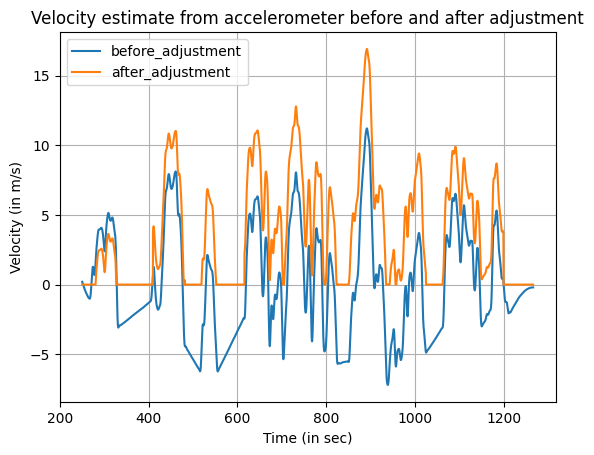

In [187]:
start3 = 5000
fs = 20
time = np.arange(0, len(imu) / fs, 1/fs)


forward_acc = imu['linear_acceleration.x'][start3:].to_numpy()
lp_fc = 0.2
order = 4
nyq = 0.5 * fs
lp_fc_norm = lp_fc / nyq
b, a = butter(order, lp_fc_norm, btype='lowpass')
forward_acc = filtfilt(b, a, forward_acc)
forward_acc = forward_acc*np.cos(pitch_original_gyro[start3:]) + forward_acc*np.sin(pitch_original_gyro[start3:])

new_forward_acc = forward_acc.copy()

#high_pass yaw_rate/gyro
hp_fc = 0.001
order = 4
nyq = 0.5 * fs
hp_fc_norm = hp_fc / nyq
b, a = butter(order, hp_fc_norm, btype='highpass')
new_forward_acc = filtfilt(b, a, forward_acc)

new_forward_acc = detrend(new_forward_acc)

new_forward_acc = new_forward_acc - new_forward_acc[0]
forward_velocity_after = np.zeros_like(new_forward_acc)
forward_velocity_after[0] = new_forward_acc[0]
forward_velocity_after[1:] = cumtrapz(new_forward_acc,dx=dt)

forward_velocity_before = np.zeros_like(forward_acc)
forward_velocity_before[0] = forward_acc[0]
forward_velocity_before[1:] = cumtrapz(forward_acc,dx=dt)

detrend_vel = detrend(forward_velocity_after)
forward_vel_final = forward_velocity_after

#Method 2
forward_vel_final = detrend_vel.copy()
import numpy as np

scale = np.ones_like(forward_vel_final)

diff_acc = np.diff(new_forward_acc)

slope_threshold = 0.01
window_size = 500
zero_slope_windows = []

for i in range(len(new_forward_acc)-window_size):
    window_diff = diff_acc[i:i+window_size]
    if np.all(np.abs(window_diff) < slope_threshold):
        zero_slope_windows.append((i, i+window_size))


for window in zero_slope_windows:
    scale[window[0]:window[1]] = 0

begin = 0 
end = 0
for i in range(len(scale)):
    if(scale[i] == 1):
        end = i 
    else:
        if end > begin:
            min = np.min(forward_vel_final[begin:end])
            forward_vel_final[begin-1:end] = forward_vel_final[begin-1:end] - min
            begin = i

forward_vel_final = forward_vel_final - 1.5

forward_vel_final[scale == 0] = 0
forward_vel_final[forward_vel_final < 0] = 0

seaborn.lineplot(y = detrend_vel,x = time[start3:], label = 'before_adjustment')
seaborn.lineplot(y = forward_vel_final,x = time[start3:], label = 'after_adjustment')


plt.xlabel('Time (in sec)')
plt.title("Velocity estimate from accelerometer before and after adjustment")
plt.ylabel("Velocity (in m/s)")
plt.grid()

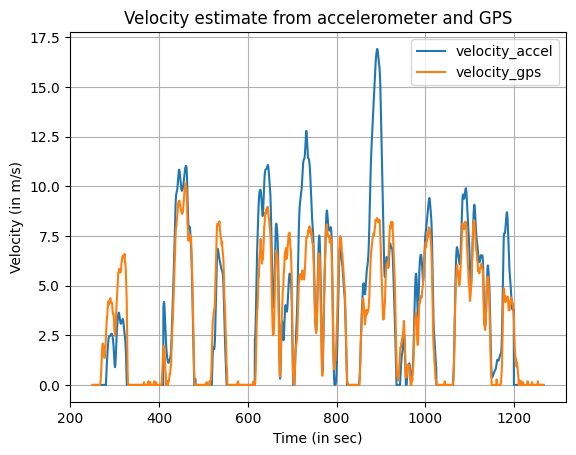

In [250]:
seaborn.lineplot(y = forward_vel_final,x = time[start3:], label = 'velocity_accel')
seaborn.lineplot(y = vel_forward_est_gps,x = time_gps[start3_gps_time:],label="velocity_gps")
plt.xlabel('Time (in sec)')
plt.title("Velocity estimate from accelerometer and GPS")
plt.ylabel("Velocity (in m/s)")
plt.grid()

Text(0, 0.5, 'Distance (in m)')

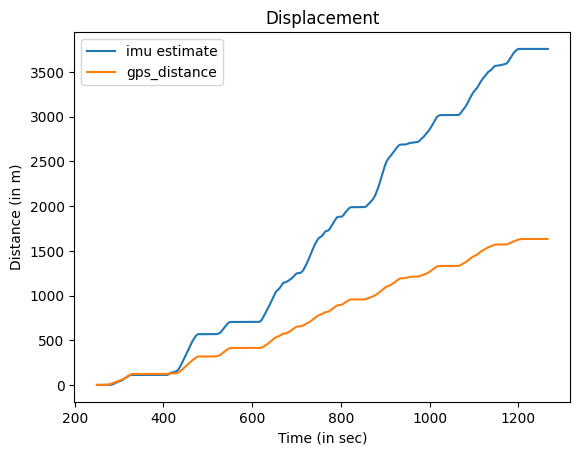

In [243]:
#Dead Reckoning
distance_imu = np.zeros_like(forward_vel_final)
distance_imu[0] = forward_vel_final[0]
distance_imu[1:] = cumtrapz(forward_vel_final,dx=1/20)
seaborn.lineplot(y = distance_imu,x = time[start3:], label = 'imu estimate')

distance_gps = np.zeros_like(vel_forward_est_gps)
distance_gps[0] = vel_forward_est_gps[0]
distance_gps[1:] = cumtrapz(vel_forward_est_gps,dx=1/2)
seaborn.lineplot(y = distance_gps,x = time_gps[start3_gps_time:], label = 'gps_distance')
plt.title("Displacement")
plt.xlabel("Time (in sec)")
plt.ylabel("Distance (in m)")

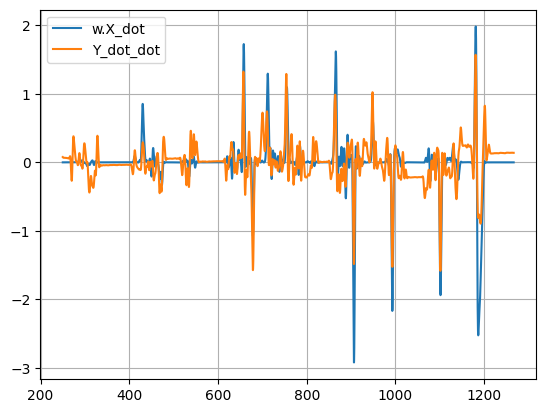

In [298]:
Y_dot_dot = imu["linear_acceleration.y"][start3:] - imu["linear_acceleration.y"][start3]
X_dot = forward_vel_final
W = imu["angular_velocity.z"][start3:]
wX_dot = W * X_dot

lp_fc = 0.2
order = 4
nyq = 0.5 * fs
lp_fc_norm = lp_fc / nyq
b, a = butter(order, lp_fc_norm, btype='lowpass')
wX_dot_filtered = filtfilt(b, a, wX_dot)
lp_fc = 0.2
order = 4
nyq = 0.5 * fs
lp_fc_norm = lp_fc / nyq
b, a = butter(order, lp_fc_norm, btype='lowpass')
Y_dot_dot_filtered = filtfilt(b, a, Y_dot_dot)

seaborn.lineplot(y = wX_dot_filtered,x = time[start3:],label = "w.X_dot")
seaborn.lineplot(y = detrend(Y_dot_dot_filtered),x = time[start3:], label = "Y_dot_dot")

plt.grid()

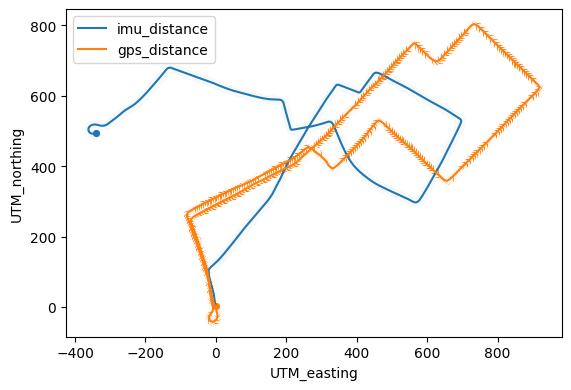

In [272]:
Cf_yaw = complimentary_filtered +0.4

Vn = np.cos(Cf_yaw)*forward_vel_final  - np.sin(Cf_yaw)*forward_vel_final
Ve = np.sin(Cf_yaw)*forward_vel_final  + np.cos(Cf_yaw)*forward_vel_final

Xe = np.zeros_like(Ve)
Xe[0] = Ve[0]
Xe[1:] = cumtrapz(Ve,dx=dt)
Xe = Xe/2 #scaled by 2
Xn = np.zeros_like(Vn)
Xn[0] = Vn[0]
Xn[1:] = cumtrapz(Vn,dx=dt)
Xn = Xn/2 #

dist_x = gps['UTM_easting'][start3_gps:]
dist_y = gps['UTM_northing'][start3_gps:]
dist_x = dist_x - dist_x[500]
dist_y = dist_y - dist_y[500]

seaborn.scatterplot(y = Xn,x = Xe)
seaborn.scatterplot(y = dist_y,x = dist_x)
plt.plot(Xe,Xn,label = 'imu_distance')
plt.plot(dist_x,dist_y,label = 'gps_distance')
plt.axis('scaled')
plt.legend()


In [323]:
w_dot = np.diff(imu["angular_velocity.z"][start3:])/np.diff(time[start3:])
xc = (Y_dot_dot[1:] - wX_dot[1:])/w_dot

In [324]:
x_c = xc.median()

In [325]:
x_c

0.5891492207064902